In [1]:
#dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#url from the california open data portal on covid cases
covid_url = "https://data.ca.gov/api/3/action/datastore_search?resource_id=926fd08f-cc91-4828-af38-bd45de97f8c3"
#request data, convert to json
covid_data = requests.get(covid_url).json()

In [3]:
#put the data into a dataframe
covid_df = pd.DataFrame(covid_data["result"]["records"])
covid_df

,totalcountconfirmed,newcountdeaths,totalcountdeaths,county,newcountconfirmed,date,_id
0,151.0,6,6.0,Santa Clara,151,2020-03-18T00:00:00,1
1,183.0,2,8.0,Santa Clara,32,2020-03-19T00:00:00,2
2,246.0,0,8.0,Santa Clara,63,2020-03-20T00:00:00,3
3,269.0,2,10.0,Santa Clara,23,2020-03-21T00:00:00,4
4,284.0,3,13.0,Santa Clara,15,2020-03-22T00:00:00,5
...,...,...,...,...,...,...,...
95,3514.0,0,154.0,Santa Clara,79,2020-06-21T00:00:00,96
96,3580.0,0,154.0,Santa Clara,66,2020-06-22T00:00:00,97
97,3700.0,1,155.0,Santa Clara,120,2020-06-23T00:00:00,98
98,3812.0,0,155.0,Santa Clara,112,2020-06-24T00:00:00,99


In [4]:
#since query only returned first 100 of 11,825 entries I added &offset=100 to get the second 100
#this means it will take 118 queries in a for loop to get the whole data set
covid_url2 = "https://data.ca.gov/api/3/action/datastore_search?resource_id=926fd08f-cc91-4828-af38-bd45de97f8c3&offset=100"
covid_data2 = requests.get(covid_url2).json()
covid_df2 = pd.DataFrame(covid_data2["result"]["records"])
covid_df2

,totalcountconfirmed,newcountdeaths,totalcountdeaths,county,newcountconfirmed,date,_id
0,3985.0,0,155.0,Santa Clara,102,2020-06-26T00:00:00,101
1,4043.0,0,155.0,Santa Clara,58,2020-06-27T00:00:00,102
2,4193.0,0,155.0,Santa Clara,150,2020-06-28T00:00:00,103
3,4372.0,1,156.0,Santa Clara,179,2020-06-29T00:00:00,104
4,4476.0,1,157.0,Santa Clara,104,2020-06-30T00:00:00,105
...,...,...,...,...,...,...,...
95,21180.0,2,314.0,Santa Clara,89,2020-09-28T00:00:00,195
96,21233.0,4,318.0,Santa Clara,53,2020-09-29T00:00:00,196
97,21318.0,4,322.0,Santa Clara,85,2020-09-30T00:00:00,197
98,21398.0,3,325.0,Santa Clara,80,2020-10-01T00:00:00,198


In [5]:
#looking at the csv file, looks more efficient to just use this for covid case data
cases_df = pd.read_csv("Resources/statewide_cases.csv")
cases_df

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date
0,Santa Clara,151.0,6.0,151,6,2020-03-18
1,Santa Clara,183.0,8.0,32,2,2020-03-19
2,Santa Clara,246.0,8.0,63,0,2020-03-20
3,Santa Clara,269.0,10.0,23,2,2020-03-21
4,Santa Clara,284.0,13.0,15,3,2020-03-22
...,...,...,...,...,...,...
11820,Yolo,2796.0,55.0,7,0,2020-09-27
11821,Yolo,2809.0,55.0,13,0,2020-09-28
11822,Yolo,2818.0,55.0,9,0,2020-09-29
11823,Yolo,2822.0,55.0,4,0,2020-09-30


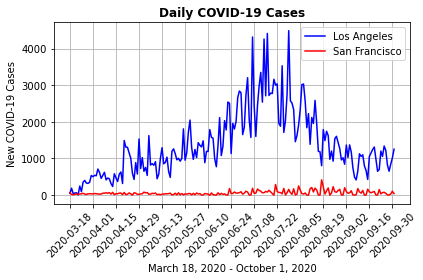

In [6]:
#put los angeles and san francisco counties into their own respective dataframes
LA_cases = cases_df.loc[(cases_df["county"] == "Los Angeles")]
SF_cases = cases_df.loc[(cases_df["county"] == "San Francisco")]

#make a list of dates for the x-axis and two lists for new confirmed cases in each county
date_axis = LA_cases["date"].tolist()
LA_y = LA_cases["newcountconfirmed"].tolist()
SF_y = SF_cases["newcountconfirmed"].tolist()

#make a chart of daily confirmed cases over time
LA_line, = plt.plot(date_axis, LA_y, color="blue", label="Los Angeles")
SF_line, = plt.plot(date_axis, SF_y, color="red", label="San Francisco")
plt.title("Daily COVID-19 Cases", fontweight="bold")
plt.xlabel("March 18, 2020 - October 1, 2020")
plt.ylabel("New COVID-19 Cases")
plt.legend(handles=[LA_line, SF_line], loc="best")

#reduce the number of ticks on the x axis with 'slice notation'
plt.xticks(date_axis[::14], rotation="45")
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/DailyCases.png", transparent=True, dpi=300)
plt.show()

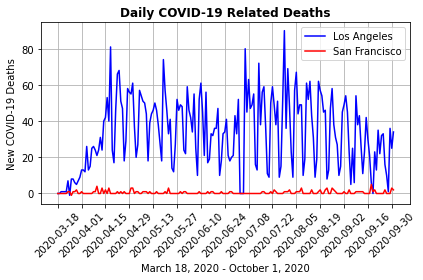

In [7]:
#same operations as above, but for daily fatality cases
date_axis = LA_cases["date"].tolist()
LA_y = LA_cases["newcountdeaths"].tolist()
SF_y = SF_cases["newcountdeaths"].tolist()
LA_line, = plt.plot(date_axis, LA_y, color="blue", label="Los Angeles")
SF_line, = plt.plot(date_axis, SF_y, color="red", label="San Francisco")
plt.title("Daily COVID-19 Related Deaths", fontweight="bold")
plt.xlabel("March 18, 2020 - October 1, 2020")
plt.ylabel("New COVID-19 Deaths")
plt.legend(handles=[LA_line, SF_line], loc="best")
plt.xticks(date_axis[::14], rotation="45")
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/DailyDeaths.png", transparent=True, dpi=300)
plt.show()

In [8]:
#from api_keys import census_key
#census_url = "https://api.census.gov/data/2019/acs/acs1/profile?get=NAME,DP02_0001E"

#Los_Angeles = "037"
#San_Francisco = "075"

#LA_url = f"{census_url}&for=county:037&in=state:06&key={census_key}"
#LA_census_data = requests.get(LA_url)
#LA_json = LA_census_data.json()
#LA_json
#THIS AREA DIDN'T WORK OUT, WENT WITH CENSUS LIBRARY WE USED IN CLASS, SEE CENSUS_WORK/LASF_CENSUS2018.CSV
#FIGURED OUT THE CENSUS STUFF, WHETHER USING A WRAP OR NOT, LEAVING THIS HERE FOR REFERENCE

In [9]:
#read in census info you made; grab county population size
LASF_census = pd.read_csv("Resources/LASF_Census2018.csv")
LA_pop = LASF_census.iloc[0, 1]
SF_pop = LASF_census.iloc[1, 1]

#use daily cases and population size to create a new column of daily cases per 100,000 individuals
LA_cases["newcountpercapita"] = (LA_cases["newcountconfirmed"]/LA_pop) * 100000
SF_cases["newcountpercapita"] = (SF_cases["newcountconfirmed"]/SF_pop) * 100000

#same operations for daily fatality cases per 100,000 individuals
LA_cases["newdeathspercapita"] = (LA_cases["newcountdeaths"]/LA_pop) * 100000
SF_cases["newdeathspercapita"] = (SF_cases["newcountdeaths"]/SF_pop) * 100000

<ipython-input-9-6b9f76fbca44>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LA_cases["newcountpercapita"] = (LA_cases["newcountconfirmed"]/LA_pop) * 100000
<ipython-input-9-6b9f76fbca44>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SF_cases["newcountpercapita"] = (SF_cases["newcountconfirmed"]/SF_pop) * 100000
<ipython-input-9-6b9f76fbca44>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

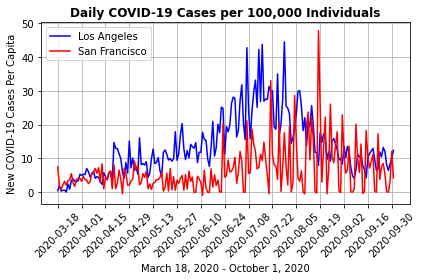

In [10]:
#make a list of dates for the x-axis and two lists for new confirmed cases in each county
LA_y2 = LA_cases["newcountpercapita"].tolist()
SF_y2 = SF_cases["newcountpercapita"].tolist()

#make a chart of daily confirmed cases over time
LA_line2, = plt.plot(date_axis, LA_y2, color="blue", label="Los Angeles")
SF_line2, = plt.plot(date_axis, SF_y2, color="red", label="San Francisco")
plt.title("Daily COVID-19 Cases per 100,000 Individuals", fontweight="bold")
plt.xlabel("March 18, 2020 - October 1, 2020")
plt.ylabel("New COVID-19 Cases Per Capita")
plt.legend(handles=[LA_line2, SF_line2], loc="best")

#reduce the number of ticks on the x axis with 'slice notation'
plt.xticks(date_axis[::14], rotation="45")

#save as .png and show
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/DailyCases_PerCapita.png", transparent=True, dpi=300)
plt.show()

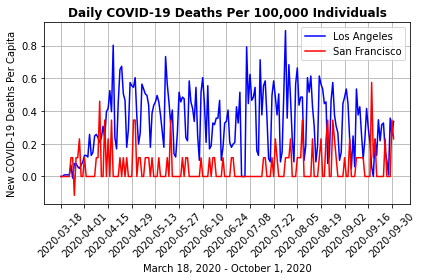

In [11]:
#same operations as above, but for daily fatality cases per capita
LA_y3 = LA_cases["newdeathspercapita"].tolist()
SF_y3 = SF_cases["newdeathspercapita"].tolist()
LA_line3, = plt.plot(date_axis, LA_y3, color="blue", label="Los Angeles")
SF_line3, = plt.plot(date_axis, SF_y3, color="red", label="San Francisco")
plt.title("Daily COVID-19 Deaths Per 100,000 Individuals", fontweight="bold")
plt.xlabel("March 18, 2020 - October 1, 2020")
plt.ylabel("New COVID-19 Deaths Per Capita")
plt.legend(handles=[LA_line3, SF_line3], loc="best")
plt.xticks(date_axis[::14], rotation="45")
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/DailyDeaths_PerCapita.png", transparent=True, dpi=300)
plt.show()

In [12]:
#new dataframe for only the LA cases over a specific 14 day period, based on COVID-19 incubation period
mask1 = (LA_cases["date"] >= "2020-03-19") & (LA_cases["date"] <= "2020-04-01")
LA_3_19to4_1 = LA_cases.loc[mask1]

#total cases and deaths
cases1 = LA_3_19to4_1["newcountconfirmed"].sum()
deaths1 = LA_3_19to4_1["newcountdeaths"].sum()

#average number of cases per day, over a 14 day period
avg_cases_1 = cases1 / len(LA_3_19to4_1)
avg_deaths_1 = deaths1 / len(LA_3_19to4_1)

In [13]:
#same operations as above for the next 3 two-week periods
mask2 = (LA_cases["date"] >= "2020-04-02") & (LA_cases["date"] <= "2020-04-15")
LA_4_2to4_15 = LA_cases.loc[mask2]
cases2 = LA_4_2to4_15["newcountconfirmed"].sum()
deaths2 = LA_4_2to4_15["newcountdeaths"].sum()
avg_cases_2 = cases2 / len(LA_4_2to4_15)
avg_deaths_2 = deaths2 / len(LA_4_2to4_15)

mask3 = (LA_cases["date"] >= "2020-04-16") & (LA_cases["date"] <= "2020-04-29")
LA_4_16to4_29 = LA_cases.loc[mask3]
cases3 = LA_4_16to4_29["newcountconfirmed"].sum()
deaths3 = LA_4_16to4_29["newcountdeaths"].sum()
avg_cases_3 = cases3 / len(LA_4_16to4_29)
avg_deaths_3 = deaths3 / len(LA_4_16to4_29)

mask4 = (LA_cases["date"] >= "2020-04-30") & (LA_cases["date"] <= "2020-05-13")
LA_4_30to5_13 = LA_cases.loc[mask4]
cases4 = LA_4_30to5_13["newcountconfirmed"].sum()
deaths4 = LA_4_30to5_13["newcountdeaths"].sum()
avg_cases_4 = cases4 / len(LA_4_30to5_13)
avg_deaths_4 = deaths4 / len(LA_4_30to5_13)

In [14]:
#same operations as above for the next 3 two-week periods
mask5 = (LA_cases["date"] >= "2020-05-14") & (LA_cases["date"] <= "2020-05-27")
LA_5_14to5_27 = LA_cases.loc[mask5]
cases5 = LA_5_14to5_27["newcountconfirmed"].sum()
deaths5 = LA_5_14to5_27["newcountdeaths"].sum()
avg_cases_5 = cases5 / len(LA_5_14to5_27)
avg_deaths_5 = deaths5 / len(LA_5_14to5_27)

mask6 = (LA_cases["date"] >= "2020-05-28") & (LA_cases["date"] <= "2020-06-10")
LA_5_2to4_28 = LA_cases.loc[mask6]
cases6 = LA_5_2to4_28["newcountconfirmed"].sum()
deaths6 = LA_5_2to4_28["newcountdeaths"].sum()
avg_cases_6 = cases6 / len(LA_5_2to4_28)
avg_deaths_6 = deaths6 / len(LA_5_2to4_28)

mask7 = (LA_cases["date"] >= "2020-06-11") & (LA_cases["date"] <= "2020-06-24")
LA_6_11to6_24 = LA_cases.loc[mask7]
cases7 = LA_6_11to6_24["newcountconfirmed"].sum()
deaths7 = LA_6_11to6_24["newcountdeaths"].sum()
avg_cases_7 = cases7 / len(LA_6_11to6_24)
avg_deaths_7 = deaths7 / len(LA_6_11to6_24)

In [15]:
#same operations as above for the next 3 two-week periods
mask8 = (LA_cases["date"] >= "2020-06-25") & (LA_cases["date"] <= "2020-07-08")
LA_6_25to7_8 = LA_cases.loc[mask8]
cases8 = LA_6_25to7_8["newcountconfirmed"].sum()
deaths8 = LA_6_25to7_8["newcountdeaths"].sum()
avg_cases_8 = cases8 / len(LA_6_25to7_8)
avg_deaths_8 = deaths8 / len(LA_6_25to7_8)

mask9 = (LA_cases["date"] >= "2020-07-09") & (LA_cases["date"] <= "2020-07-22")
LA_7_9to7_22 = LA_cases.loc[mask9]
cases9 = LA_7_9to7_22["newcountconfirmed"].sum()
deaths9 = LA_7_9to7_22["newcountdeaths"].sum()
avg_cases_9 = cases9 / len(LA_7_9to7_22)
avg_deaths_9 = deaths9 / len(LA_7_9to7_22)

mask10 = (LA_cases["date"] >= "2020-07-23") & (LA_cases["date"] <= "2020-08-05")
LA_7_23to8_5 = LA_cases.loc[mask10]
cases10 = LA_7_23to8_5["newcountconfirmed"].sum()
deaths10 = LA_7_23to8_5["newcountdeaths"].sum()
avg_cases_10 = cases10 / len(LA_7_23to8_5)
avg_deaths_10 = deaths10 / len(LA_7_23to8_5)

In [16]:
#same operations as above for the next 4 two-week periods
mask11 = (LA_cases["date"] >= "2020-08-06") & (LA_cases["date"] <= "2020-08-19")
LA_8_6to8_19 = LA_cases.loc[mask11]
cases11 = LA_8_6to8_19["newcountconfirmed"].sum()
deaths11 = LA_8_6to8_19["newcountdeaths"].sum()
avg_cases_11 = cases11 / len(LA_8_6to8_19)
avg_deaths_11 = deaths11 / len(LA_8_6to8_19)

mask12 = (LA_cases["date"] >= "2020-08-20") & (LA_cases["date"] <= "2020-09-02")
LA_8_20to9_2 = LA_cases.loc[mask12]
cases12 = LA_8_20to9_2["newcountconfirmed"].sum()
deaths12 = LA_8_20to9_2["newcountdeaths"].sum()
avg_cases_12 = cases12 / len(LA_8_20to9_2)
avg_deaths_12 = deaths12 / len(LA_8_20to9_2)

mask13 = (LA_cases["date"] >= "2020-09-03") & (LA_cases["date"] <= "2020-09-16")
LA_9_3to9_16 = LA_cases.loc[mask13]
cases13 = LA_9_3to9_16["newcountconfirmed"].sum()
deaths13 = LA_9_3to9_16["newcountdeaths"].sum()
avg_cases_13 = cases13 / len(LA_9_3to9_16)
avg_deaths_13 = deaths13 / len(LA_9_3to9_16)

mask14 = (LA_cases["date"] >= "2020-09-17") & (LA_cases["date"] <= "2020-09-30")
LA_9_17to9_30 = LA_cases.loc[mask14]
cases14 = LA_9_17to9_30["newcountconfirmed"].sum()
deaths14 = LA_9_17to9_30["newcountdeaths"].sum()
avg_cases_14 = cases14 / len(LA_9_17to9_30)
avg_deaths_14 = deaths14 / len(LA_9_17to9_30)

In [17]:
#new lists created and placed into new dataframe for all 14 days periods in the data
LA_weeks = ["03-19 to 04-01", "04-02 to 04-15", "04-16 to 04-29", "04-30 to 05-13", "05-14 to 05-27", "05-28 to 06-10", "06-11 to 06-24",
           "06-25 to 07-08", "07-09 to 07-22", "07-23 to 08-05", "08-06 to 08-19", "08-20 to 09-02", "09-03 to 09-16", "09-17 to 09-30"]
LA_cases = [cases1, cases2, cases3, cases4, cases5, cases6, cases7,
            cases8, cases9, cases10, cases11, cases12, cases13, cases14]
LA_deaths = [deaths1, deaths2, deaths3, deaths4, deaths5, deaths6, deaths7,
            deaths8, deaths9, deaths10, deaths11, deaths12, deaths13, deaths14]
LA_avg_cases = [avg_cases_1, avg_cases_2, avg_cases_3, avg_cases_4, avg_cases_5, avg_cases_6, avg_cases_7,
                avg_cases_8, avg_cases_9, avg_cases_10, avg_cases_11, avg_cases_12, avg_cases_13, avg_cases_14]
LA_avg_deaths = [avg_deaths_1, avg_deaths_2, avg_deaths_3, avg_deaths_4, avg_deaths_5, avg_deaths_6, avg_deaths_7,
                 avg_deaths_8, avg_deaths_9, avg_deaths_10, avg_deaths_11, avg_deaths_12, avg_deaths_13, avg_deaths_14]

LA_weekly = pd.DataFrame({"Two Week Period (2020)": LA_weeks,
                          "Total Cases": LA_cases, "Total Deaths": LA_deaths,
                          "Average Daily Cases": LA_avg_cases, "Average Daily Deaths": LA_avg_deaths})
#new columns for per capita added
LA_weekly["Average Daily Cases Per Capita"] = (LA_weekly["Average Daily Cases"]/LA_pop) * 100000
LA_weekly["Average Daily Deaths Per Capita"] = (LA_weekly["Average Daily Deaths"]/LA_pop) * 100000
LA_weekly

,Two Week Period (2020),Total Cases,Total Deaths,Average Daily Cases,Average Daily Deaths,Average Daily Cases Per Capita,Average Daily Deaths Per Capita
0,03-19 to 04-01,3455,66,246.785714,4.714286,2.443894,0.046685
1,04-02 to 04-15,6914,336,493.857143,24.000000,4.890618,0.237670
2,04-16 to 04-29,12144,654,867.428571,46.714286,8.590058,0.462607
3,04-30 to 05-13,12014,603,858.142857,43.071429,8.498103,0.426532
4,05-14 to 05-27,14137,536,1009.785714,38.285714,9.999807,0.379140
5,05-28 to 06-10,18307,573,1307.642857,40.928571,12.949457,0.405312
6,06-11 to 06-24,22548,437,1610.571429,31.214286,15.949328,0.309112
7,06-25 to 07-08,33896,437,2421.142857,31.214286,23.976336,0.309112
8,07-09 to 07-22,41780,571,2984.285714,40.785714,29.553083,0.403897
9,07-23 to 08-05,33113,612,2365.214286,43.714286,23.422481,0.432898


In [18]:
#same exact process for SF_cases
mask1 = (SF_cases["date"] >= "2020-03-19") & (SF_cases["date"] <= "2020-04-01")
SF_3_19to4_1 = SF_cases.loc[mask1]
cases1 = SF_3_19to4_1["newcountconfirmed"].sum()
deaths1 = SF_3_19to4_1["newcountdeaths"].sum()
avg_cases_1 = cases1 / len(SF_3_19to4_1)
avg_deaths_1 = deaths1 / len(SF_3_19to4_1)
mask2 = (SF_cases["date"] >= "2020-04-02") & (SF_cases["date"] <= "2020-04-15")
SF_4_2to4_15 = SF_cases.loc[mask2]
cases2 = SF_4_2to4_15["newcountconfirmed"].sum()
deaths2 = SF_4_2to4_15["newcountdeaths"].sum()
avg_cases_2 = cases2 / len(SF_4_2to4_15)
avg_deaths_2 = deaths2 / len(SF_4_2to4_15)
mask3 = (SF_cases["date"] >= "2020-04-16") & (SF_cases["date"] <= "2020-04-29")
SF_4_16to4_29 = SF_cases.loc[mask3]
cases3 = SF_4_16to4_29["newcountconfirmed"].sum()
deaths3 = SF_4_16to4_29["newcountdeaths"].sum()
avg_cases_3 = cases3 / len(SF_4_16to4_29)
avg_deaths_3 = deaths3 / len(SF_4_16to4_29)
mask4 = (SF_cases["date"] >= "2020-04-30") & (SF_cases["date"] <= "2020-05-13")
SF_4_30to5_13 = SF_cases.loc[mask4]
cases4 = SF_4_30to5_13["newcountconfirmed"].sum()
deaths4 = SF_4_30to5_13["newcountdeaths"].sum()
avg_cases_4 = cases4 / len(SF_4_30to5_13)
avg_deaths_4 = deaths4 / len(SF_4_30to5_13)
mask5 = (SF_cases["date"] >= "2020-05-14") & (SF_cases["date"] <= "2020-05-27")
SF_5_14to5_27 = SF_cases.loc[mask5]
cases5 = SF_5_14to5_27["newcountconfirmed"].sum()
deaths5 = SF_5_14to5_27["newcountdeaths"].sum()
avg_cases_5 = cases5 / len(SF_5_14to5_27)
avg_deaths_5 = deaths5 / len(SF_5_14to5_27)
mask6 = (SF_cases["date"] >= "2020-05-28") & (SF_cases["date"] <= "2020-06-10")
SF_5_2to4_28 = SF_cases.loc[mask6]
cases6 = SF_5_2to4_28["newcountconfirmed"].sum()
deaths6 = SF_5_2to4_28["newcountdeaths"].sum()
avg_cases_6 = cases6 / len(SF_5_2to4_28)
avg_deaths_6 = deaths6 / len(SF_5_2to4_28)
mask7 = (SF_cases["date"] >= "2020-06-11") & (SF_cases["date"] <= "2020-06-24")
SF_6_11to6_24 = SF_cases.loc[mask7]
cases7 = SF_6_11to6_24["newcountconfirmed"].sum()
deaths7 = SF_6_11to6_24["newcountdeaths"].sum()
avg_cases_7 = cases7 / len(SF_6_11to6_24)
avg_deaths_7 = deaths7 / len(SF_6_11to6_24)
mask8 = (SF_cases["date"] >= "2020-06-25") & (SF_cases["date"] <= "2020-07-08")
SF_6_25to7_8 = SF_cases.loc[mask8]
cases8 = SF_6_25to7_8["newcountconfirmed"].sum()
deaths8 = SF_6_25to7_8["newcountdeaths"].sum()
avg_cases_8 = cases8 / len(SF_6_25to7_8)
avg_deaths_8 = deaths8 / len(SF_6_25to7_8)
mask9 = (SF_cases["date"] >= "2020-07-09") & (SF_cases["date"] <= "2020-07-22")
SF_7_9to7_22 = SF_cases.loc[mask9]
cases9 = SF_7_9to7_22["newcountconfirmed"].sum()
deaths9 = SF_7_9to7_22["newcountdeaths"].sum()
avg_cases_9 = cases9 / len(SF_7_9to7_22)
avg_deaths_9 = deaths9 / len(SF_7_9to7_22)
mask10 = (SF_cases["date"] >= "2020-07-23") & (SF_cases["date"] <= "2020-08-05")
SF_7_23to8_5 = SF_cases.loc[mask10]
cases10 = SF_7_23to8_5["newcountconfirmed"].sum()
deaths10 = SF_7_23to8_5["newcountdeaths"].sum()
avg_cases_10 = cases10 / len(SF_7_23to8_5)
avg_deaths_10 = deaths10 / len(SF_7_23to8_5)
mask11 = (SF_cases["date"] >= "2020-08-06") & (SF_cases["date"] <= "2020-08-19")
SF_8_6to8_19 = SF_cases.loc[mask11]
cases11 = SF_8_6to8_19["newcountconfirmed"].sum()
deaths11 = SF_8_6to8_19["newcountdeaths"].sum()
avg_cases_11 = cases11 / len(SF_8_6to8_19)
avg_deaths_11 = deaths11 / len(SF_8_6to8_19)
mask12 = (SF_cases["date"] >= "2020-08-20") & (SF_cases["date"] <= "2020-09-02")
SF_8_20to9_2 = SF_cases.loc[mask12]
cases12 = SF_8_20to9_2["newcountconfirmed"].sum()
deaths12 = SF_8_20to9_2["newcountdeaths"].sum()
avg_cases_12 = cases12 / len(SF_8_20to9_2)
avg_deaths_12 = deaths12 / len(SF_8_20to9_2)
mask13 = (SF_cases["date"] >= "2020-09-03") & (SF_cases["date"] <= "2020-09-16")
SF_9_3to9_16 = SF_cases.loc[mask13]
cases13 = SF_9_3to9_16["newcountconfirmed"].sum()
deaths13 = SF_9_3to9_16["newcountdeaths"].sum()
avg_cases_13 = cases13 / len(SF_9_3to9_16)
avg_deaths_13 = deaths13 / len(SF_9_3to9_16)
mask14 = (SF_cases["date"] >= "2020-09-17") & (SF_cases["date"] <= "2020-09-30")
SF_9_17to9_30 = SF_cases.loc[mask14]
cases14 = SF_9_17to9_30["newcountconfirmed"].sum()
deaths14 = SF_9_17to9_30["newcountdeaths"].sum()
avg_cases_14 = cases14 / len(SF_9_17to9_30)
avg_deaths_14 = deaths14 / len(SF_9_17to9_30)
SF_weeks = ["03-19 to 04-01", "04-02 to 04-15", "04-16 to 04-29", "04-30 to 05-13", "05-14 to 05-27", "05-28 to 06-10", "06-11 to 06-24",
           "06-25 to 07-08", "07-09 to 07-22", "07-23 to 08-05", "08-06 to 08-19", "08-20 to 09-02", "09-03 to 09-16", "09-17 to 09-30"]
SF_cases = [cases1, cases2, cases3, cases4, cases5, cases6, cases7,
            cases8, cases9, cases10, cases11, cases12, cases13, cases14]
SF_deaths = [deaths1, deaths2, deaths3, deaths4, deaths5, deaths6, deaths7,
            deaths8, deaths9, deaths10, deaths11, deaths12, deaths13, deaths14]
SF_avg_cases = [avg_cases_1, avg_cases_2, avg_cases_3, avg_cases_4, avg_cases_5, avg_cases_6, avg_cases_7,
                avg_cases_8, avg_cases_9, avg_cases_10, avg_cases_11, avg_cases_12, avg_cases_13, avg_cases_14]
SF_avg_deaths = [avg_deaths_1, avg_deaths_2, avg_deaths_3, avg_deaths_4, avg_deaths_5, avg_deaths_6, avg_deaths_7,
                 avg_deaths_8, avg_deaths_9, avg_deaths_10, avg_deaths_11, avg_deaths_12, avg_deaths_13, avg_deaths_14]

SF_weekly = pd.DataFrame({"Two Week Period (2020)": SF_weeks,
                          "Total Cases": SF_cases, "Total Deaths": SF_deaths,
                          "Average Daily Cases": SF_avg_cases, "Average Daily Deaths": SF_avg_deaths})
#new columns for per capita added
SF_weekly["Average Daily Cases Per Capita"] = (SF_weekly["Average Daily Cases"]/SF_pop) * 100000
SF_weekly["Average Daily Deaths Per Capita"] = (SF_weekly["Average Daily Deaths"]/SF_pop) * 100000
SF_weekly

,Two Week Period (2020),Total Cases,Total Deaths,Average Daily Cases,Average Daily Deaths,Average Daily Cases Per Capita,Average Daily Deaths Per Capita
0,03-19 to 04-01,367,6,26.214286,0.428571,3.012984,0.049259
1,04-02 to 04-15,574,11,41.000000,0.785714,4.712405,0.090307
2,04-16 to 04-29,483,6,34.500000,0.428571,3.965317,0.049259
3,04-30 to 05-13,515,12,36.785714,0.857143,4.228029,0.098517
4,05-14 to 05-27,390,5,27.857143,0.357143,3.201809,0.041049
5,05-28 to 06-10,380,4,27.142857,0.285714,3.119711,0.032839
6,06-11 to 06-24,442,4,31.571429,0.285714,3.628716,0.032839
7,06-25 to 07-08,877,2,62.642857,0.142857,7.199964,0.016420
8,07-09 to 07-22,1380,3,98.571429,0.214286,11.329476,0.024629
9,07-23 to 08-05,1228,9,87.714286,0.642857,10.081592,0.073888


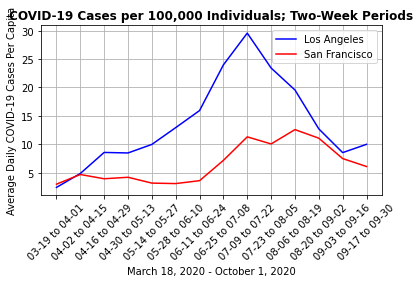

In [19]:
#two-week period dataframe placed into new charts, same as above
#make a list of dates for the x-axis and two lists for new confirmed cases in each county
date_axis = LA_weekly["Two Week Period (2020)"].tolist()
LA_y = LA_weekly["Average Daily Cases Per Capita"].tolist()
SF_y = SF_weekly["Average Daily Cases Per Capita"].tolist()
LA_line, = plt.plot(date_axis, LA_y, color="blue", label="Los Angeles")
SF_line, = plt.plot(date_axis, SF_y, color="red", label="San Francisco")
plt.title("COVID-19 Cases per 100,000 Individuals; Two-Week Periods", fontweight="bold")
plt.xlabel("March 18, 2020 - October 1, 2020")
plt.ylabel("Average Daily COVID-19 Cases Per Capita")
plt.legend(handles=[LA_line, SF_line], loc="best")
plt.xticks(date_axis, rotation="45")
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/AverageCases_PerCapita.png", transparent=True, dpi=300)
plt.show()

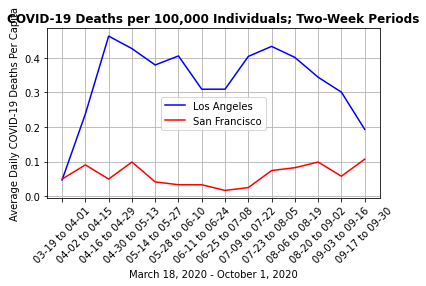

In [20]:
LA_y = LA_weekly["Average Daily Deaths Per Capita"].tolist()
SF_y = SF_weekly["Average Daily Deaths Per Capita"].tolist()
LA_line, = plt.plot(date_axis, LA_y, color="blue", label="Los Angeles")
SF_line, = plt.plot(date_axis, SF_y, color="red", label="San Francisco")
plt.title("COVID-19 Deaths per 100,000 Individuals; Two-Week Periods", fontweight="bold")
plt.xlabel("March 18, 2020 - October 1, 2020")
plt.ylabel("Average Daily COVID-19 Deaths Per Capita")
plt.legend(handles=[LA_line, SF_line], loc="best")
plt.xticks(date_axis, rotation="45")
plt.grid()
plt.tight_layout()
plt.savefig("Output_data/AverageDeaths_PerCapita.png", transparent=True, dpi=300)
plt.show()